In [1]:
# Our engines
import numpy as np
import scipy.integrate
import scipy.optimize
import pandas as pd
import time
from numba import jit
from mpmath import mp

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget

%config InlineBackend.figure_formats = {'png', 'retina'}

rcrc = {'grid': True,
      'axisbelow': True,
      'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18}
sns.set_context('notebook', rc=rcrc)
#sns.set_style('whitegrid', rc=rcrc)

import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

plt.rcParams['text.usetex'] = False

In [2]:
colors = np.array([[   0.5,    0.5,    0.5],   #  1) gray
                   [0.3010, 0.7450, 0.9330],   #  2) cyan
                   [     0, 0.4470, 0.7410],   #  3) blue
                   [     0, 0.2235, 0.3705],   #  4) dark blue
                   [0.4940, 0.1840, 0.5560],   #  5) purple
                   [0.8500, 0.3250, 0.0980],   #  6) orange
                   [0.9290, 0.6940, 0.1250],   #  7) yellow/gold
                   [0.5882, 0.2941,      0],   #  8) brown
                   [0.9500, 0.0800, 0.0980],   #  9) red
                   [0.9525, 0.1170, 0.5520],   # 10) pink-magenta
                   [0.6350, 0.0780, 0.1840],   # 11) dark red
                   [0.4660, 0.6740, 0.1880],   # 12) green    
                   [     0,      0,      0]])  # 13) black

In [3]:
filename = '/Volumes/James McGehee Mac/Documents/MATLAB_data/leslie_sna_HCR_quantification/averages_SEM.csv'
#filename = '/Users/jamesmcgehee/Desktop/averages_SEM.csv'
csvFile = pd.read_csv(filename)
arr_2copy = csvFile['mean 2 copies'].to_numpy()
arr_1copy = csvFile['mean 1 copies'].to_numpy()

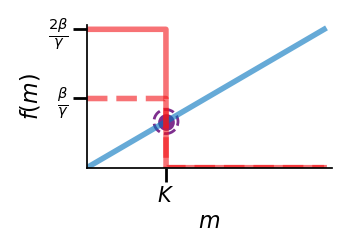

In [4]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
fig.set_size_inches(3.5, 2.5)

m = np.linspace(0.00001, 3, 10000)

beta = 1.5
gamma = 1

K = 1

f_m2 = 2 * beta / gamma * (1 - np.heaviside(m-K,0))
f_m1 = 1 * beta / gamma * (1 - np.heaviside(m-K,0))


ax.plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
ax.plot(m, f_m2, color=colors[8], linewidth=4, alpha=0.6)
ax.plot(m, f_m1, '--', color=colors[8], linewidth=4, alpha=0.6)

if 2 * beta / gamma > K:
    ax.scatter(K, K, s=100, color=colors[4], linewidth=2)
else:
    ax.scatter(2 * beta / gamma, 2 * beta / gamma, s=100, color=colors[4], linewidth=2)

if beta / gamma > K:
    ax.scatter(K, K, s=300, color=colors[4], linestyle='--', linewidth=2, facecolors='none')
else:
    ax.scatter(beta / gamma, beta / gamma, s=300, color=colors[4], linestyle='--', linewidth=2, facecolors='none')

ax.set_xticks((K,))
ax.set_xticklabels([r'$K$'])
#ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
    
ax.set_yticks((beta/gamma, 2 * beta/gamma))
ax.set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$\frac{2\beta}{\gamma}$'])
#ax[np.floor(i/3).astype(int),i%3].set_yticklabels(np.round((beta_gamma[1,i], beta_gamma[0,i]), decimals=2))

#ax[np.floor(i/3).astype(int),i%3].set_yticks((0,1,2,3))

ax.set_xlim([0,3.1]);
ax.set_ylim([0,3.1]);

# Customize x-axis ticks
#ax.tick_params(axis='x', direction='out', length=100, width=10, color='black')

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=7)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
    
ax.set_ylabel('$f(m)$', fontsize=16);
ax.set_xlabel('$m$', fontsize=16);

# Hide grid lines
#ax.grid(False)

#ax.grid(axis='x')

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/example_step_func.pdf')

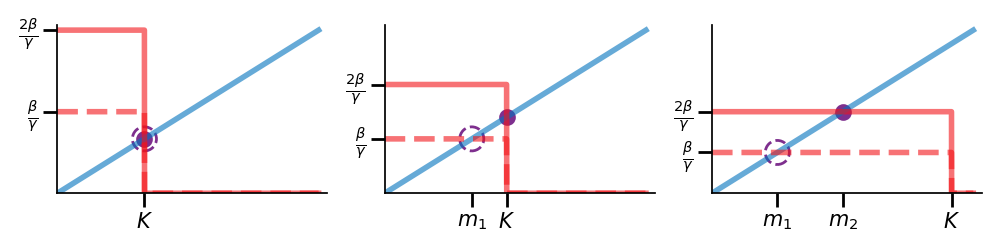

In [5]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 3)

# Label the axes and title the plot
fig.set_size_inches(10, 2.5)

m = np.linspace(0.00001, 3, 10000)

beta = [1.5, 1, .75]
gamma = 1

K = [1, 1.4, 2.75]

for i in range(3):

    f_m2 = 2 * beta[i] / gamma * (1 - np.heaviside(m-K[i],0))
    f_m1 = 1 * beta[i] / gamma * (1 - np.heaviside(m-K[i],0))
    
    ax[i].plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
    ax[i].plot(m, f_m2, color=colors[8], linewidth=4, alpha=0.6)
    ax[i].plot(m, f_m1, '--', color=colors[8], linewidth=4, alpha=0.6)

    if 2 * beta[i] / gamma > K[i]:
        ax[i].scatter(K[i], K[i], s=100, color=colors[4], linewidth=2)
    else:
        ax[i].scatter(2 * beta[i] / gamma, 2 * beta[i] / gamma, s=100, color=colors[4], linewidth=2)
    
    if beta[i] / gamma > K[i]:
        ax[i].scatter(K[i], K[i], s=300, color=colors[4], linestyle='--', linewidth=2, facecolors='none')
    else:
        ax[i].scatter(beta[i] / gamma, beta[i] / gamma, s=300, color=colors[4], linestyle='--', linewidth=2, facecolors='none')

    if i == 0:
        ax[i].set_xticks((K[i],))
        ax[i].set_xticklabels([r'$K$'])
        #ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
    elif i == 1:
        ax[i].set_xticks((beta[i] / gamma, K[i],))
        ax[i].set_xticklabels([r'$m_1$',r'$K$'])
    elif i == 2:
        ax[i].set_xticks((beta[i] / gamma, 2* beta[i] / gamma, K[i],))
        ax[i].set_xticklabels([r'$m_1$', r'$m_2$', r'$K$'])
        
    ax[i].set_yticks((beta[i]/gamma, 2 * beta[i]/gamma))
    ax[i].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$\frac{2\beta}{\gamma}$'])
    #ax[np.floor(i/3).astype(int),i%3].set_yticklabels(np.round((beta_gamma[1,i], beta_gamma[0,i]), decimals=2))
    
    #ax[np.floor(i/3).astype(int),i%3].set_yticks((0,1,2,3))
    
    ax[i].set_xlim([0,3.1]);
    ax[i].set_ylim([0,3.1]);
    
    # Customize x-axis ticks
    #ax.tick_params(axis='x', direction='out', length=100, width=10, color='black')
    
    ax[i].tick_params(which='both', width=2)
    ax[i].tick_params(which='major', length=10)
    ax[i].tick_params(which='minor', length=7)
    
    # Hide the right and top spines
    ax[i].spines[['right', 'top']].set_visible(False)
    
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
        
    #ax[i].set_ylabel('$f(m)$', fontsize=16);
    #ax[i].set_xlabel('$m$', fontsize=16);

#fig.supxlabel('$m$')
#fig.supylabel('$f(m)$')

# Hide grid lines
#ax.grid(False)

#ax.grid(axis='x')

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/category_step_func.pdf')

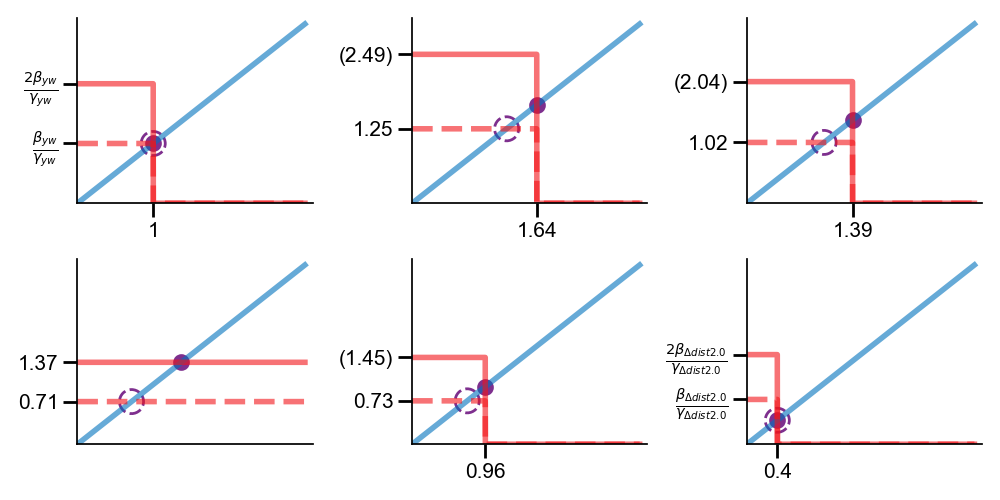

In [6]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(2, 3)

# Label the axes and title the plot
fig.set_size_inches(10, 5)

m = np.linspace(0.00001, 3, 10000)

beta_gamma = np.array([[2, 2 * arr_1copy[4], 2 * arr_1copy[6], arr_2copy[9], 2 * arr_1copy[7], 1.5],
              [1, arr_1copy[4], arr_1copy[6], arr_1copy[9], arr_1copy[7], 0.75]])
K = [1, arr_2copy[4], arr_2copy[6], 100, arr_2copy[7], arr_2copy[8]]

title_label = [r'$yw$',
               r'$\Delta prox4.4$',
               r'$\Delta prox2.6 dl L>H$',
               r'$sna^1$',
               r'$\Delta dist0.4$',
               r'$\Delta dist2.0$']

f_m = np.zeros((len(m), 6, 2))

for i in range(6):
    for j in range(2):
        if i == 3:
            f_m[:,i,j] = beta_gamma[j,i]
        else:
            f_m[:,i,j] = beta_gamma[j,i] * (1 - np.heaviside(m-K[i],0))

    ax[np.floor(i/3).astype(int),i%3].plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
    ax[np.floor(i/3).astype(int),i%3].plot(m, f_m[:,i,0], color=colors[8], linewidth=4, alpha=0.6)
    ax[np.floor(i/3).astype(int),i%3].plot(m, f_m[:,i,1], '--', color=colors[8], linewidth=4, alpha=0.6)

    if beta_gamma[0,i] > K[i]:
        ax[np.floor(i/3).astype(int),i%3].scatter(K[i], K[i], s=100, color=colors[4], alpha=1, linewidth=2)
    else:
        ax[np.floor(i/3).astype(int),i%3].scatter(beta_gamma[0,i], beta_gamma[0,i], s=100, color=colors[4], alpha=1, linewidth=2)
            
    if beta_gamma[1,i] > K[i]:
        ax[np.floor(i/3).astype(int),i%3].scatter(K[i], K[i], s=300, color=colors[4], alpha=1, linestyle='--', linewidth=2,
                                                  facecolors='none')
    else:
        ax[np.floor(i/3).astype(int),i%3].scatter(beta_gamma[1,i], beta_gamma[1,i], s=300, color=colors[4], alpha=1, linestyle='--',
                                                  linewidth=2, facecolors='none')

    #ax[np.floor(i/3).astype(int),i%3].title.set_text(title_label[i])

    if np.any([i == k for k in [0]]):
        ax[np.floor(i/3).astype(int),i%3].set_xticks((K[i],))
        #ax[np.floor(i/3).astype(int),i%3].set_xticklabels([r'$K$'])
        ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
        
        ax[np.floor(i/3).astype(int),i%3].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))
        #ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$2\frac{\beta}{\gamma}$'])
        ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta_{yw}}{\gamma_{yw}}$', r'$\frac{2\beta_{yw}}{\gamma_{yw}}$'])
    elif np.any([i == k for k in [1,2,4]]):
        ax[np.floor(i/3).astype(int),i%3].set_xticks((K[i],))
        #ax[np.floor(i/3).astype(int),i%3].set_xticklabels([r'$K$'])
        ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
        
        ax[np.floor(i/3).astype(int),i%3].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))
        #ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$2\frac{\beta}{\gamma}$'])
        ax[np.floor(i/3).astype(int),i%3].set_yticklabels([np.round(beta_gamma[1,i], decimals=2), 
                                                          r'({})'.format(np.round(beta_gamma[0,i], decimals=2))])
    elif np.any([i == k for k in [3]]):
        ax[np.floor(i/3).astype(int),i%3].set_xticks((K[i],))
        #ax[np.floor(i/3).astype(int),i%3].set_xticklabels([r'$K$'])
        ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
        
        ax[np.floor(i/3).astype(int),i%3].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))
        #ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$2\frac{\beta}{\gamma}$'])
        ax[np.floor(i/3).astype(int),i%3].set_yticklabels(np.round((beta_gamma[1,i], beta_gamma[0,i]), decimals=2))
    elif np.any([i == k for k in [5]]):
        ax[np.floor(i/3).astype(int),i%3].set_xticks((K[i],))
        #ax[np.floor(i/3).astype(int),i%3].set_xticklabels([r'$K$'])
        ax[np.floor(i/3).astype(int),i%3].set_xticklabels(np.round([K[i]], decimals=2))
        
        ax[np.floor(i/3).astype(int),i%3].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))
        #ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$2\frac{\beta}{\gamma}$'])
        ax[np.floor(i/3).astype(int),i%3].set_yticklabels([r'$\frac{\beta_{\Delta dist2.0}}{\gamma_{\Delta dist2.0}}$',
                                                           r'$\frac{2\beta_{\Delta dist2.0}}{\gamma_{\Delta dist2.0}}$'])
        
    
    #ax[np.floor(i/3).astype(int),i%3].set_yticks((0,1,2,3))

    ax[np.floor(i/3).astype(int),i%3].set_xlim([0,3.1]);
    ax[np.floor(i/3).astype(int),i%3].set_ylim([0,3.1]);

    # Customize x-axis ticks
    #ax.tick_params(axis='x', direction='out', length=100, width=10, color='black')
    
    ax[np.floor(i/3).astype(int),i%3].tick_params(which='both', width=2)
    ax[np.floor(i/3).astype(int),i%3].tick_params(which='major', length=10)
    ax[np.floor(i/3).astype(int),i%3].tick_params(which='minor', length=7)

    if i == 3:
        ax[np.floor(i/3).astype(int),i%3].tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)

    # Hide the right and top spines
    ax[np.floor(i/3).astype(int),i%3].spines[['right', 'top']].set_visible(False)

    ax[np.floor(i/3).astype(int),i%3].tick_params(axis='x', labelsize=15)
    ax[np.floor(i/3).astype(int),i%3].tick_params(axis='y', labelsize=15)

#fig.supxlabel('$m$')
#fig.supylabel('$f(m)$')
    
#ax.set_ylabel('$f(m)$', fontsize=24);
#ax.set_xlabel(r'$m$', fontsize=24);

# Hide grid lines
#ax.grid(False)

#ax.grid(axis='x')

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/data_step_func.pdf')

In [7]:
def root_fun(m, c, beta_gamma, K, n):
    return c * beta_gamma * (1 / (1 + (m/K)**n)) - m

def _msolve_hill(c, beta_gamma, K, n):
    return scipy.optimize.brentq(root_fun, 0, 500, args=(c, beta_gamma, K, n))

def msolve_hill(c, beta_gamma, K, n):
    if np.isscalar(beta_gamma):
        if np.isscalar(K):
            result = _msolve_hill(c, beta_gamma, K, n)
        else:
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
    else:
        if np.isscalar(K):
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
        else:
            result = np.empty((len(beta_gamma), len(K)))
            for i, beta_gamma_ in enumerate(beta_gamma):
                for j, K_ in enumerate(K):
                    result[i, j] = _msolve_hill(c, beta_gamma_, K_, n)

    return result

def msolve_step(c, beta_gamma, K):
    if np.isscalar(beta_gamma):
        if np.isscalar(K):
            result = _msolve_step(c, beta_gamma, K)
        else:
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
    else:
        if np.isscalar(K):
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
        else:
            result = np.empty((len(beta_gamma), len(K)))
            for i, beta_gamma_ in enumerate(beta_gamma):
                for j, K_ in enumerate(K):
                    result[i, j] = _msolve_step(c, beta_gamma_, K_)

    return result

def _msolve_step(c, beta_gamma, K):
    if (c * beta_gamma) >= K:
        return K
    else:
        return (c * beta_gamma)

In [9]:
n = 4
K = np.linspace(0.01, 3, 501)
beta_gamma = np.linspace(0.01, 3, 501)

# Create data for the contour plot
K_mesh, beta_gamma_mesh = np.meshgrid(K, beta_gamma)

start_time = time.time()

m2_hill = msolve_hill(2, beta_gamma, K, n)
m1_hill = msolve_hill(1, beta_gamma, K, n)

m2_step = msolve_step(2, beta_gamma, K)
m1_step = msolve_step(1, beta_gamma, K)

m2_diff = 100 * np.abs(m2_hill - m2_step)/np.mean((m2_hill, m2_step), axis=0)
m1_diff = 100 * np.abs(m1_hill - m1_step)/np.mean((m2_hill, m2_step), axis=0)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 13.650146722793579 seconds


In [ ]:
# Sample DataFrame
df = pd.DataFrame(m1_step)

# Write to CSV
file_name = '/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/test.csv'
#df.to_csv(file_name, index=False)

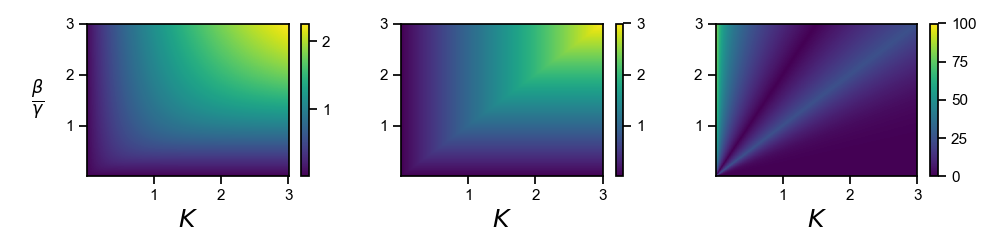

In [10]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 3)

# Label the axes and title the plot
fig.set_size_inches(10, 2.5)

# Plot the contour lines
con_plt = ax[0].pcolormesh(K_mesh, beta_gamma_mesh, m1_hill)
con_plt.set_rasterized(True)
fig.colorbar(con_plt, ax=ax[0])  # Add a colorbar to show the values
ax[0].set_xlabel(r'$K$');
ax[0].set_ylabel(r'$\frac{\beta}{\gamma}$', rotation='horizontal', labelpad=20, va="center");

# Plot the contour lines
con_plt = ax[1].pcolormesh(K_mesh, beta_gamma_mesh, m1_step)
con_plt.set_rasterized(True)
fig.colorbar(con_plt, ax=ax[1])  # Add a colorbar to show the values
ax[1].set_xlabel(r'$K$');
#ax[1].set_ylabel(r'$\frac{\beta}{\gamma}$');

# Plot the contour lines
con_plt = ax[2].pcolormesh(K_mesh, beta_gamma_mesh, m1_diff, vmax=100)
con_plt.set_rasterized(True)
fig.colorbar(con_plt, ax=ax[2])  # Add a colorbar to show the values
ax[2].set_xlabel(r'$K$');
#ax[2].set_ylabel(r'$\frac{\beta}{\gamma}$');

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/step_hill_ss.pdf')
plt.show()

In [11]:
def _step_func_analysis(m1, m2):
    if m1/m2 >= 0.9:
        K = np.mean((m1,m2))
        beta_gamma = np.nan
    elif m1/m2 <= 0.6:
        K = np.nan
        beta_gamma = np.mean((m1,m2/2))
    else:
        K = m2
        beta_gamma = m1
        
    return (K, beta_gamma)

def step_func_analysis(m1, m2):
    if np.isscalar(m1):
        if np.isscalar(m2):
            K, beta_gamma = _step_func_analysis(m1, m2)
        else:
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
    else:
        if np.isscalar(m2):
            raise ValueError('beta/gamma and K must both be scalar or both be vector')
        else:
            K = np.empty(np.shape(m1))
            beta_gamma = np.empty(np.shape(m1))
            for i in range(np.shape(m1)[0]):
                for j in range(np.shape(m1)[1]):
                    K[i, j], beta_gamma[i, j] = _step_func_analysis(m1[i,j], m2[i,j])

    return (K, beta_gamma)

In [12]:
start_time = time.time()

K_step, beta_gamma_step = step_func_analysis(m1_hill, m2_hill)

K_diff = 100 * np.abs(K_step - K_mesh)/K_mesh
beta_gamma_diff = 100 * np.abs(beta_gamma_step - beta_gamma_mesh)/beta_gamma_mesh

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.9267063140869141 seconds


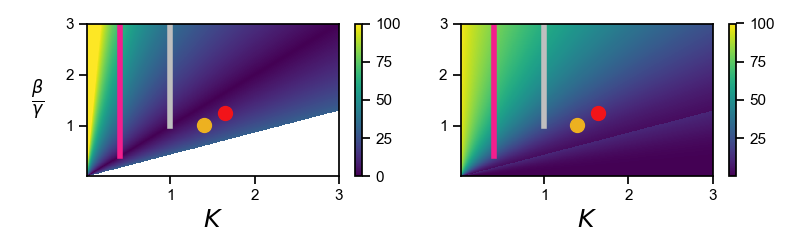

In [13]:
plt.close()

ol_c = np.array([[  0.75,   0.75,   0.75],   #  0) light-gray
                 [0.9290, 0.6940, 0.1250],   #  1) yellow/gold
                 [0.9500, 0.0800, 0.0980],   #  2) red
                 [0.9525, 0.1170, 0.5520]])  #  3) pink-magenta

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(8, 2.5)

# Plot the contour lines
#con_plt = ax[0].contourf(beta_gamma_mesh, K_mesh, K_diff, levels=np.append(100 * np.linspace(0, 1, 11), 1000), vmax=100)
con_plt = ax[0].pcolormesh(K_mesh, beta_gamma_mesh, K_diff, vmax=100)
con_plt.set_rasterized(True)
ax[0].plot(arr_2copy[4], arr_1copy[4], 'o', color=ol_c[2], markersize=10)
ax[0].plot(arr_2copy[6], arr_1copy[6], 'o', color=ol_c[1], markersize=10)
ax[0].plot([1,1], [1,3], '-', color=ol_c[0], linewidth=4)
ax[0].plot([0.4,0.4], [0.4,3], '-', color=ol_c[3], linewidth=4)
fig.colorbar(con_plt, ax=ax[0])  # Add a colorbar to show the values
#ax[0,0].title.set_text('Contour Plot');
ax[0].set_xlabel(r'$K$');
ax[0].set_ylabel(r'$\frac{\beta}{\gamma}$', rotation='horizontal', labelpad=20, va="center");

# Plot the contour lines
#con_plt = ax[1].contourf(beta_gamma_mesh, K_mesh, beta_gamma_diff, levels=np.append(100 * np.linspace(0, 1, 11),1000), vmax=100)
con_plt = ax[1].pcolormesh(K_mesh, beta_gamma_mesh, beta_gamma_diff, vmax=100)
con_plt.set_rasterized(True)
ax[1].plot(arr_2copy[4], arr_1copy[4], 'o', color=ol_c[2], markersize=10)
ax[1].plot(arr_2copy[6], arr_1copy[6], 'o', color=ol_c[1], markersize=10)
ax[1].plot([1,1], [1,3], '-', color=ol_c[0], linewidth=4)
ax[1].plot([0.4,0.4], [0.4,3], '-', color=ol_c[3], linewidth=4)
fig.colorbar(con_plt, ax=ax[1])  # Add a colorbar to show the values
#ax[1].title.set_text('Contour Plot');
ax[1].set_xlabel(r'$K$');
#ax[1].set_ylabel(r'$\frac{\beta}{\gamma}$');

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/K_bg_diff.pdf')
plt.show()

In [14]:
def root_fun(m, c, beta, gamma, K, n):
    return c * beta * (1 / (1 + (m/K)**n)) - gamma * m

def _msolve(c, beta, gamma, K, n):
    return scipy.optimize.brentq(root_fun, 0, 4, args=(c, beta, gamma, K, n))

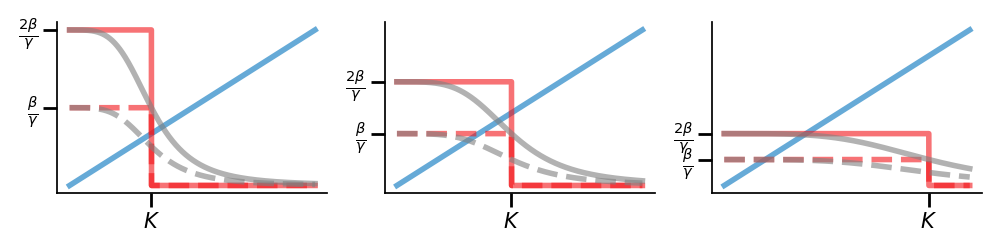

In [15]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 3)

# Label the axes and title the plot
fig.set_size_inches(10, 2.5)

m = np.linspace(0.00001, 3, 10000)

beta = [1.5, 1, .5]
gamma = 1

n = 4

K = [1, 1.4, 2.5]

for i in range(3):
    f_m2 = 2 * beta[i] / gamma * (1 - np.heaviside(m-K[i],0))
    f_m1 = 1 * beta[i] / gamma * (1 - np.heaviside(m-K[i],0))
    
    ax[i].plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
    ax[i].plot(m, f_m2, color=colors[8], linewidth=4, alpha=0.6)
    ax[i].plot(m, f_m1, '--', color=colors[8], linewidth=4, alpha=0.6)

    f_m2_hill = 2 * beta[i] / gamma * (1 / (1 + (m/K[i])**n))
    f_m1_hill = 1 * beta[i] / gamma * (1 / (1 + (m/K[i])**n))

    m_2 = _msolve(2, beta[i], gamma, K[i], n)
    m_1 = _msolve(1, beta[i], gamma, K[i], n)

    ax[i].plot(m, f_m2_hill, color=colors[0], linewidth=4, alpha=0.6)
    ax[i].plot(m, f_m1_hill, '--', color=colors[0], linewidth=4, alpha=0.6)
    
    ax[i].set_xticks((K[i],))
    ax[i].set_xticklabels([r'$K$'])
        
    ax[i].set_yticks((beta[i]/gamma, 2 * beta[i]/gamma))
    ax[i].set_yticklabels([r'$\frac{\beta}{\gamma}$', r'$\frac{2\beta}{\gamma}$'])
    
    
    ax[i].tick_params(which='both', width=2)
    ax[i].tick_params(which='major', length=10)
    ax[i].tick_params(which='minor', length=7)
    
    # Hide the right and top spines
    ax[i].spines[['right', 'top']].set_visible(False)
    
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/hill_vs_step_func.pdf')

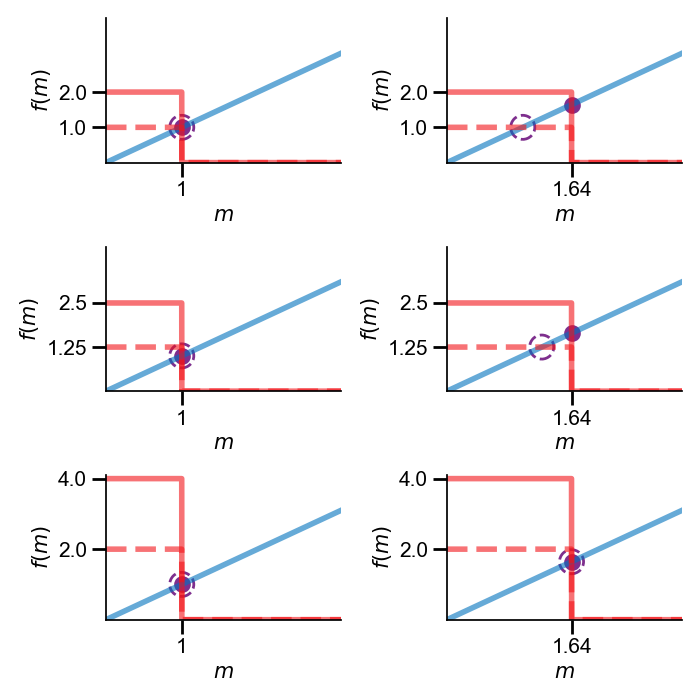

In [16]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(3, 2)

# Label the axes and title the plot
fig.set_size_inches(7, 7)

m = np.linspace(0.00001, 5, 10000)

beta_gamma = np.array([[2, 2, 2.5, 2.5, 4, 4],
              [1, 1, 1.25, 1.25, 2, 2]])
K = [1, arr_2copy[4], 1, arr_2copy[4], 1, arr_2copy[4]]

f_m = np.zeros((len(m), 6, 2))

for i in range(6):
    for j in range(2):
        f_m[:,i,j] = beta_gamma[j,i] * (1 - np.heaviside(m-K[i],0))

    ax[np.floor(i/2).astype(int),i%2].plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
    ax[np.floor(i/2).astype(int),i%2].plot(m, f_m[:,i,0], color=colors[8], linewidth=4, alpha=0.6)
    ax[np.floor(i/2).astype(int),i%2].plot(m, f_m[:,i,1], '--', color=colors[8], linewidth=4, alpha=0.6)

    if beta_gamma[0,i] > K[i]:
        ax[np.floor(i/2).astype(int),i%2].scatter(K[i], K[i], s=100, color=colors[4], linewidth=2)
    else:
        ax[np.floor(i/2).astype(int),i%2].scatter(beta_gamma[0,i], beta_gamma[0,i], s=100, color=colors[4], linewidth=2)
            
    if beta_gamma[1,i] > K[i]:
        ax[np.floor(i/2).astype(int),i%2].scatter(K[i], K[i], s=300, color=colors[4], linestyle='--', linewidth=2,
                                                  facecolors='none')
    else:
        ax[np.floor(i/2).astype(int),i%2].scatter(beta_gamma[1,i], beta_gamma[1,i], s=300, color=colors[4], linestyle='--',
                                                  linewidth=2, facecolors='none')

    ax[np.floor(i/2).astype(int),i%2].set_xticks((K[i],))
    ax[np.floor(i/2).astype(int),i%2].set_xticklabels(np.round([K[i]], decimals=2))
        
    ax[np.floor(i/2).astype(int),i%2].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))
    ax[np.floor(i/2).astype(int),i%2].set_yticklabels(np.round((beta_gamma[1,i], beta_gamma[0,i]), decimals=2))

    ax[np.floor(i/2).astype(int),i%2].set_xlim([0,3.1]);
    ax[np.floor(i/2).astype(int),i%2].set_ylim([0,4.1]);
    
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='both', width=2)
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='major', length=10)
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='minor', length=7)

    # Hide the right and top spines
    ax[np.floor(i/2).astype(int),i%2].spines[['right', 'top']].set_visible(False)

    ax[np.floor(i/2).astype(int),i%2].tick_params(axis='x', labelsize=15)
    ax[np.floor(i/2).astype(int),i%2].tick_params(axis='y', labelsize=15)

    ax[np.floor(i/2).astype(int),i%2].set_ylabel('$f(m)$', fontsize=15);
    ax[np.floor(i/2).astype(int),i%2].set_xlabel(r'$m$', fontsize=15);

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/distance_effect_step_func.pdf')

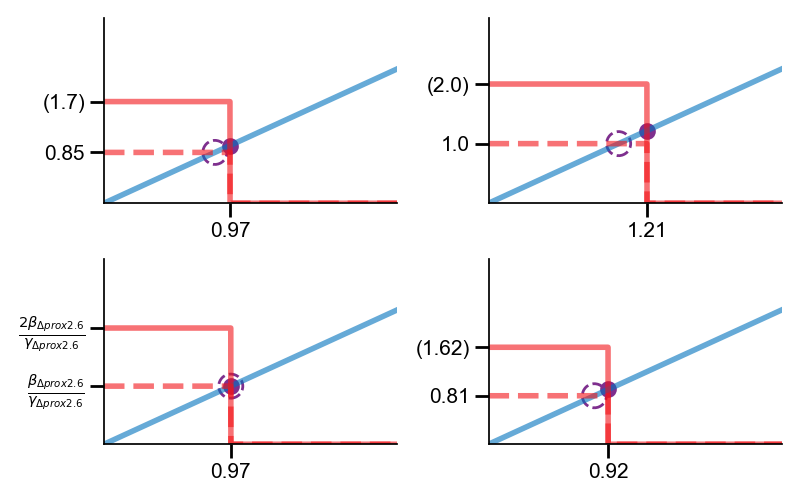

In [17]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(2, 2)

# Label the axes and title the plot
fig.set_size_inches(8, 5)

m = np.linspace(0.00001, 3, 10000)

beta_gamma = np.array([[2 * arr_1copy[1], 2 * arr_1copy[2], 2 * arr_2copy[3], 2 * arr_1copy[5]],
              [arr_1copy[1], arr_1copy[2], arr_2copy[3], arr_1copy[5]]])
K = [arr_2copy[1], arr_2copy[2], arr_2copy[3], arr_2copy[5]]

title_label = [r'$yw$',
               r'$\Delta prox4.4$',
               r'$\Delta prox2.6 dl L>H$',
               r'$sna^1$',
               r'$\Delta dist0.4$',
               r'$\Delta dist2.0$']

f_m = np.zeros((len(m), 6, 2))

for i in range(4):
    for j in range(2):
        f_m[:,i,j] = beta_gamma[j,i] * (1 - np.heaviside(m-K[i],0))

    ax[np.floor(i/2).astype(int),i%2].plot(m, m, color=colors[2], linewidth=4, alpha=0.6)
    ax[np.floor(i/2).astype(int),i%2].plot(m, f_m[:,i,0], color=colors[8], linewidth=4, alpha=0.6)
    ax[np.floor(i/2).astype(int),i%2].plot(m, f_m[:,i,1], '--', color=colors[8], linewidth=4, alpha=0.6)

    if beta_gamma[0,i] > K[i]:
        ax[np.floor(i/2).astype(int),i%2].scatter(K[i], K[i], s=100, color=colors[4], linewidth=2)
    else:
        ax[np.floor(i/2).astype(int),i%2].scatter(beta_gamma[0,i], beta_gamma[0,i], s=100, color=colors[4], linewidth=2)
            
    if beta_gamma[1,i] > K[i]:
        ax[np.floor(i/2).astype(int),i%2].scatter(K[i], K[i], s=300, color=colors[4], linestyle='--', linewidth=2,
                                                  facecolors='none')
    else:
        ax[np.floor(i/2).astype(int),i%2].scatter(beta_gamma[1,i], beta_gamma[1,i], s=300, color=colors[4], linestyle='--',
                                                  linewidth=2, facecolors='none')


    ax[np.floor(i/2).astype(int),i%2].set_xticks((K[i],))
    ax[np.floor(i/2).astype(int),i%2].set_xticklabels(np.round([K[i]], decimals=2))
        
    ax[np.floor(i/2).astype(int),i%2].set_yticks((beta_gamma[1,i], beta_gamma[0,i]))

    if i == 2:
        ax[np.floor(i/2).astype(int),i%2].set_yticklabels([r'$\frac{\beta_{\Delta prox2.6}}{\gamma_{\Delta prox2.6}}$',
                                                           r'$\frac{2\beta_{\Delta prox2.6}}{\gamma_{\Delta prox2.6}}$'])
    else:
        ax[np.floor(i/2).astype(int),i%2].set_yticklabels([np.round(beta_gamma[1,i], decimals=2), 
                                                              r'({})'.format(np.round(beta_gamma[0,i], decimals=2))])

    ax[np.floor(i/2).astype(int),i%2].set_xlim([0,2.25]);
    ax[np.floor(i/2).astype(int),i%2].set_ylim([0,3.1]);
    
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='both', width=2)
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='major', length=10)
    ax[np.floor(i/2).astype(int),i%2].tick_params(which='minor', length=7)

    # Hide the right and top spines
    ax[np.floor(i/2).astype(int),i%2].spines[['right', 'top']].set_visible(False)

    ax[np.floor(i/2).astype(int),i%2].tick_params(axis='x', labelsize=15)
    ax[np.floor(i/2).astype(int),i%2].tick_params(axis='y', labelsize=15)

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/plots/step_func/data_sup_step_func.pdf')

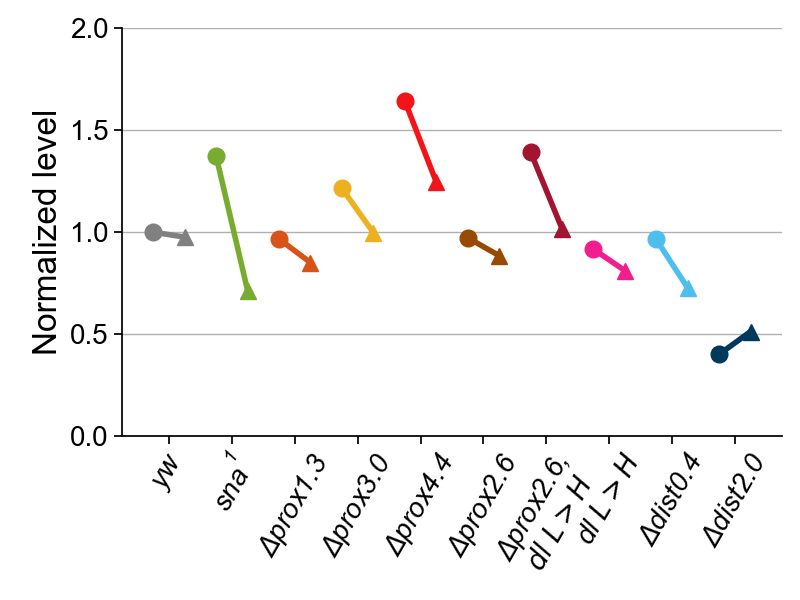

In [18]:
plt.close()

labels = [r'$\mathdefault{yw}$',#1
          r'$\mathdefault{\Delta dist 0.4}$',#2
          r'$\mathdefault{\Delta dist 1.8}$',#3
          r'$\mathdefault{\Delta dist 2.0}$',#4
          r'$\mathdefault{\Delta prox 1.3,}$' '\n' r'$\mathit{dist 2.0}$',#5
          r'$\mathdefault{\Delta prox 1.3}$',#6
          r'$\mathdefault{\Delta prox 3.0}$',#7
          r'$\mathdefault{\Delta prox 2.6}$',#8
          r'$\mathdefault{\Delta prox 4.4}$',#9
          r'$\mathdefault{dl}$ $\mathit{L > H}$',#10
          r'$\mathdefault{\Delta prox 2.6,}$' '\n' r'$\mathit{dl}$ $\mathit{L > H}$',#11
          r'$\mathdefault{sna^1}$']#12

# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
fig.set_size_inches(8, 6)

ind = [0,11,5,6,8,7,10,9,1,3]
ind2 = [0,9,1,2,4,3,6,5,7,8]
#ind = [0,11,5,6,7,8,9,10,1,2,3,4]
ax.set_ylabel('Normalized level', fontsize=24)

ax.set_xlim([0,len(ind)*2+1])
ax.set_ylim([0,2])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

j = 1
for i in range(len(ind)):
    arr_1copy[ind2[i]]
    arr_2copy[ind2[i]]
    ax.plot(j, arr_2copy[ind2[i]], 'o', label=labels[ind[i]], color=colors[ind[i]], markersize=12)
    ax.plot(j+1, arr_1copy[ind2[i]], '^', color=colors[ind[i]], markersize=12)

    ax.plot([j,j+1], [arr_2copy[ind2[i]],arr_1copy[ind2[i]]], '-', color=colors[ind[i]], linewidth=4)    
    j += 2

ax.set_xticks(np.arange(0,len(ind)*2,2)+1.5)
ax.set_xticklabels([labels[k] for k in ind], style='italic', rotation=60)
ax.grid(axis='y')
ax.spines[['right', 'top']].set_visible(False)
            
plt.tight_layout()

#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/data.pdf')

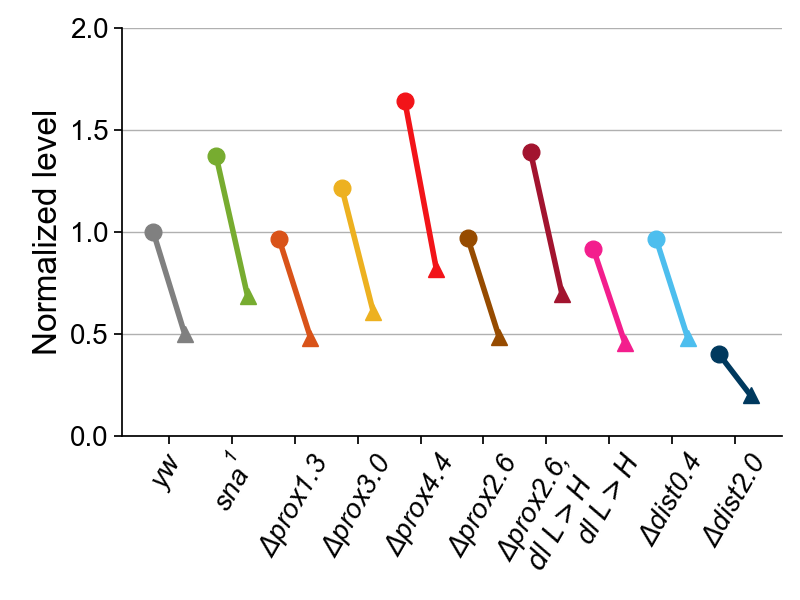

In [19]:
plt.close()

labels = [r'$\mathdefault{yw}$',#1
          r'$\mathdefault{\Delta dist 0.4}$',#2
          r'$\mathdefault{\Delta dist 1.8}$',#3
          r'$\mathdefault{\Delta dist 2.0}$',#4
          r'$\mathdefault{\Delta prox 1.3,}$' '\n' r'$\mathit{dist 2.0}$',#5
          r'$\mathdefault{\Delta prox 1.3}$',#6
          r'$\mathdefault{\Delta prox 3.0}$',#7
          r'$\mathdefault{\Delta prox 2.6}$',#8
          r'$\mathdefault{\Delta prox 4.4}$',#9
          r'$\mathdefault{dl}$ $\mathit{L > H}$',#10
          r'$\mathdefault{\Delta prox 2.6,}$' '\n' r'$\mathit{dl}$ $\mathit{L > H}$',#11
          r'$\mathdefault{sna^1}$']#12

# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
fig.set_size_inches(8, 6)

ind = [0,11,5,6,8,7,10,9,1,3]
ind2 = [0,9,1,2,4,3,6,5,7,8]
#ind = [0,11,5,6,7,8,9,10,1,2,3,4]
ax.set_ylabel('Normalized level', fontsize=24)

ax.set_xlim([0,len(ind)*2+1])
ax.set_ylim([0,2])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

j = 1
for i in range(len(ind)):
    arr_1copy[ind2[i]]
    arr_2copy[ind2[i]]
    ax.plot(j, arr_2copy[ind2[i]], 'o', label=labels[ind[i]], color=colors[ind[i]], markersize=12)
    ax.plot(j+1, arr_2copy[ind2[i]]/2, '^', color=colors[ind[i]], markersize=12)

    ax.plot([j,j+1], [arr_2copy[ind2[i]],arr_2copy[ind2[i]]/2], '-', color=colors[ind[i]], linewidth=4)    
    j += 2

ax.set_xticks(np.arange(0,len(ind)*2,2)+1.5)
ax.set_xticklabels([labels[k] for k in ind], style='italic', rotation=60)
ax.grid(axis='y')
ax.spines[['right', 'top']].set_visible(False)
            
plt.tight_layout()

#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/data_half.pdf')

In [20]:
def solve_beta(r, n):
    numerator = (2 * r**(n+1)) - 1
    denominator = r**(n+1) - r
    m = numerator/denominator
    m = m.astype(dtype=np.complex128)

    if m > 0:
        B = ((2 - m)/(m**(n+1)))**(1/n)
    else:
        B =np.nan

    if np.isreal(B):
        B = np.real(B)
    else:
        B = np.nan
    
    return B

In [21]:
def solve_n_m(R, r_m, r_c, n_c):
    m_c_n = (2 * r_c**(n_c+1)) - 1
    m_c_d = r_c**(n_c+1) - r_c
    m_c = m_c_n/m_c_d
    #m = m.astype(dtype=np.complex128)
    
    log_n = 1 - (R * r_m * m_c)
    log_d = 2 - (R * m_c)

    if (log_d != 0) and (log_n/log_d > 0):
        n_m = (np.log(log_n/log_d)/np.log(r_m)) - 1
    else:
        n_m = np.nan

    return n_m

In [22]:
arr_ratio_nond = arr_1copy / arr_2copy
arr_ratio_nond[-2] = 0.99
#arr = np.sort(arr_ratio_nond)
#sorted_indices = np.argsort(arr_ratio_nond)

n_c = np.linspace(0.01, 100, 10000)
B_c = np.zeros([len(arr_ratio_nond), len(n_c)])
n_m = np.zeros([len(arr_ratio_nond), len(n_c)])
B_m = np.zeros([len(arr_ratio_nond), len(n_c)])

for j, n_ in enumerate(n_c):
    for i, r in enumerate(arr_ratio_nond):
        B_c[i,j] = solve_beta(r, n_)
        n_m[i,j] = solve_n_m(arr_2copy[i], r, arr_ratio_nond[0], n_)


for i, r in enumerate(arr_ratio_nond):
    for j, n_ in enumerate(n_m[i,:]):
        B_m[i,j] = solve_beta(r, n_)

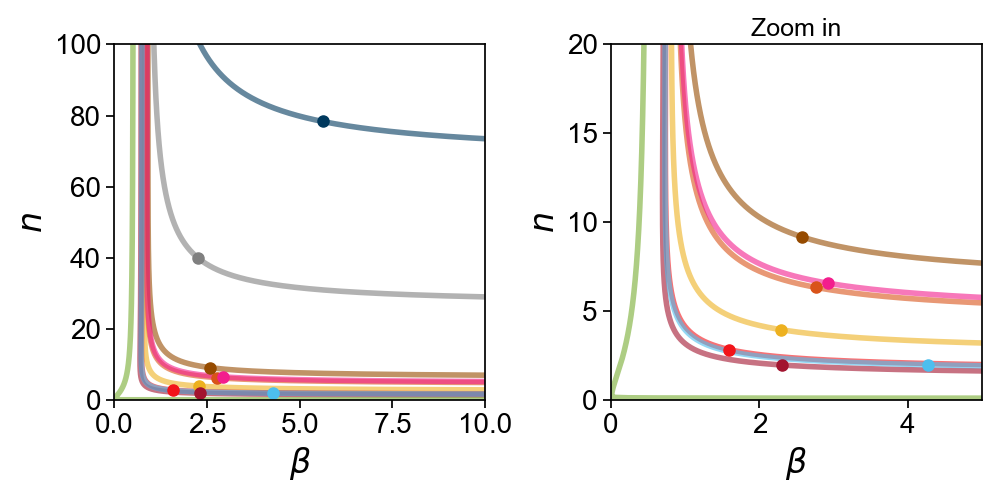

In [23]:
plt.close()
ind_lab = np.array([0, 5, 6, 7, 8, 9, 10, 1, 3, 11], dtype=int)

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(10, 5)

j = 3999
    
for i in range(len(arr_ratio_nond)):
    # Plot the contour lines
    ax[0].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
    ax[1].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
    
for i, n_m_ in enumerate(n_m[:,j]):
    ax[0].plot(B_m[i,j], n_m_, 'o', label=r'$a$', color=colors[ind_lab[i]], markersize=8)
    ax[1].plot(B_m[i,j], n_m_, 'o', label=r'$a$', color=colors[ind_lab[i]], markersize=8)

ax[1].title.set_text('Zoom in');
ax[0].set_ylabel('$n$', fontsize=24);
ax[0].set_xlabel(r'$\beta$', fontsize=24);
ax[1].set_ylabel('$n$', fontsize=24);
ax[1].set_xlabel(r'$\beta$', fontsize=24);
ax[0].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[0].set_xlim([0,10.0]);
ax[0].set_ylim([0,100]);
ax[1].set_xlim([0,5]);
ax[1].set_ylim([0,20]);

#ax.grid(axis='x')

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/model_1_0_simple_n_vs_beta.pdf')

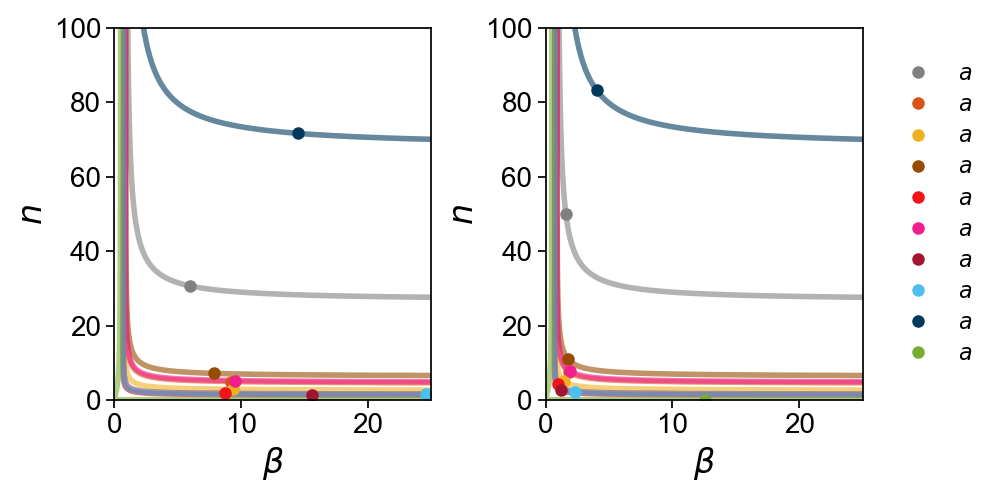

In [24]:
plt.close()
ind_lab = np.array([0, 5, 6, 7, 8, 9, 10, 1, 3, 11], dtype=int)

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(10, 5)

j1 = 3070
j2 = 5000
    
for i in range(len(arr_ratio_nond)):
    # Plot the contour lines
    ax[0].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
    ax[1].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
    
for i, n_m_ in enumerate(n_m[:,j1]):
    ax[0].plot(B_m[i,j1], n_m_, 'o', label=r'$a$', color=colors[ind_lab[i]], markersize=8)

for i, n_m_ in enumerate(n_m[:,j2]):
    ax[1].plot(B_m[i,j2], n_m_, 'o', label=r'$a$', color=colors[ind_lab[i]], markersize=8)

ax[0].set_ylabel('$n$', fontsize=24);
ax[0].set_xlabel(r'$\beta$', fontsize=24);
ax[1].set_ylabel('$n$', fontsize=24);
ax[1].set_xlabel(r'$\beta$', fontsize=24);
ax[0].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[0].set_xlim([0,25.0]);
ax[0].set_ylim([0,100]);
ax[1].set_xlim([0,25.0]);
ax[1].set_ylim([0,100]);

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=16, frameon=False);

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/supp_model_1_0_n_vs_beta.pdf')

interactive(children=(IntSlider(value=0, description='n_c', max=9999, step=50), Output()), _dom_classes=('widg…

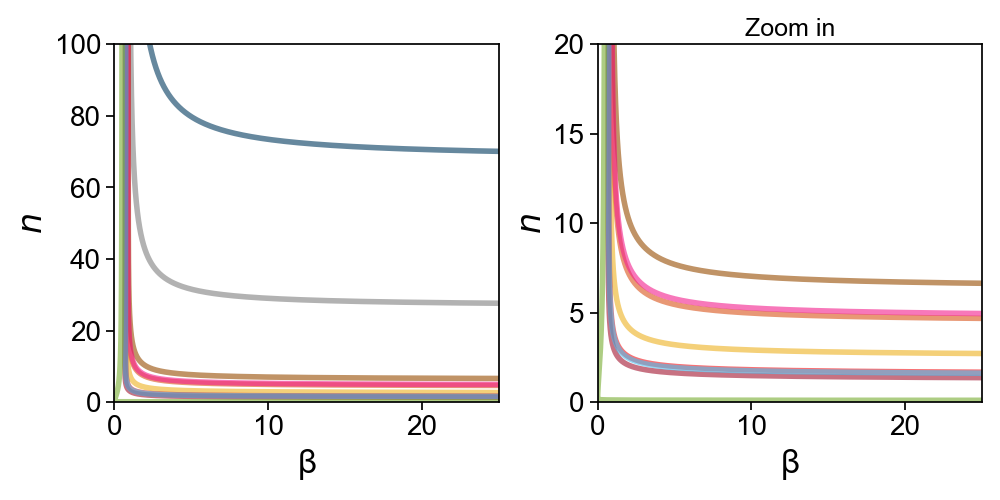

In [25]:
plt.close()
ind_lab = np.array([0, 5, 6, 7, 8, 9, 10, 1, 3, 11], dtype=int)

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(10, 5)

def update_plot(j):
    ax[0].clear()
    ax[1].clear()
    
    for i in range(len(arr_ratio_nond)):
        # Plot the contour lines
        ax[0].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
        ax[1].plot(B_c[i,:], n_c, color=colors[ind_lab[i]], linewidth=4, alpha=0.6)
    
    for i, n_m_ in enumerate(n_m[:,j]):
        #if i == 0 or i == 8:
        ax[0].plot(B_m[i,j],n_m_, 'o', color=colors[ind_lab[i]], markersize=8)
        #else:
        ax[1].plot(B_m[i,j],n_m_, 'o', color=colors[ind_lab[i]], markersize=8)

    ax[1].title.set_text('Zoom in');
    ax[0].set_ylabel('$n$', fontsize=24);
    ax[0].set_xlabel(r'$\mathdefault{\beta}$', fontsize=24);
    ax[1].set_ylabel('$n$', fontsize=24);
    ax[1].set_xlabel(r'$\mathdefault{\beta}$', fontsize=24);
    ax[0].tick_params(axis='x', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20)
    ax[0].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='y', labelsize=20)
    ax[0].set_xlim([0,25.0]);
    ax[0].set_ylim([0,100]);
    ax[1].set_xlim([0,25.0]);
    ax[1].set_ylim([0,20]);
        
    fig.canvas.draw()

update_plot(2999);

# Create the slider
#n_c_slider = widgets.IntSlider(min=2999, max=7000, value=2999, step=100, description='n_c');
n_c_slider = widgets.IntSlider(min=0, max=9999, value=0, step=50, description='n_c');

# Use the interact function to connect the slider to the update_plot function
widgets.interact(update_plot, j=n_c_slider);

plt.tight_layout()
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/plots_diagrams_equations/model_1_0_simple_n_vs_beta.pdf')

In [26]:
def sna_simple_nond(lvl, t, n, B, y, c):
    
    m, p = lvl

    dm_dt = (c/(1+p**n)) - m

    dp_dt = (B * m - p) * y
    
    return (dm_dt, dp_dt)

In [27]:
def sna1_simple_nond(lvl, t, B, y, c):
    
    m, p = lvl

    dm_dt = c - m

    dp_dt = (B * m - p) * y
    
    return (dm_dt, dp_dt)

In [28]:
labels = [r'$\mathdefault{yw}$',#1
          r'$\mathdefault{\Delta dist 0.4}$',#2
          r'$\mathdefault{\Delta dist 1.8}$',#3
          r'$\mathdefault{\Delta dist 2.0}$',#4
          r'$\mathdefault{\Delta prox 1.3,}$' '\n' r'$\mathit{dist 2.0}$',#5
          r'$\mathdefault{\Delta prox 1.3}$',#6
          r'$\mathdefault{\Delta prox 3.0}$',#7
          r'$\mathdefault{\Delta prox 2.6}$',#8
          r'$\mathdefault{\Delta prox 4.4}$',#9
          r'$\mathdefault{dl}$ $\mathit{L > H}$',#10
          r'$\mathdefault{\Delta prox 2.6,}$' '\n' r'$\mathit{dl}$ $\mathit{L > H}$',#11
          r'$\mathdefault{sna^1}$']#12

simple_labels = ['yw',#1
          'dist 0.4',#2
          'dist 1.8',#3
          'dist 2.0',#4
          'prox 1.3,dist 2.0',#5
          'prox 1.3',#6
          'prox 3.0',#7
          'prox 2.6',#8
          'prox 4.4',#9
          'dl L > H',#10
          'prox 2.6, dl L > H}',#11
          'sna^1']#12

y = 1
# Params for 2 copies, and 1 copy
c = [2,1]

c0 = np.array([0.0, 0.0])
t = np.linspace(0.0, 100, 10001)

m = np.zeros([len(n_m),len(t),2])
p = np.zeros([len(n_m),len(t),2])

for j in range(2):
    for i in range(len(n_m)-1):
        args = (n_m[i,3999], B_m[i,3999], y, c[j])

        lvls = scipy.integrate.odeint(sna_simple_nond, c0, t, args=args)
        m[i,:,j], p[i,:,j] = lvls.transpose()

    args_sna1 = (2.25, y, c[j])
    lvls = scipy.integrate.odeint(sna1_simple_nond, c0, t, args=args_sna1)
    m[-1,:,j], p[-1,:,j] = lvls.transpose()

1copy/2copies for yw data = 0.98 model = 0.98
1copy/2copies for prox 1.3 data = 0.88 model = 0.88
1copy/2copies for prox 3.0 data = 0.82 model = 0.82
1copy/2copies for prox 4.4 data = 0.76 model = 0.76
1copy/2copies for prox 2.6 data = 0.91 model = 0.91
1copy/2copies for prox 2.6, dl L > H} data = 0.73 model = 0.73
1copy/2copies for dl L > H data = 0.89 model = 0.89
1copy/2copies for dist 0.4 data = 0.75 model = 0.75
1copy/2copies for dist 2.0 data = 1.28 model = 0.99


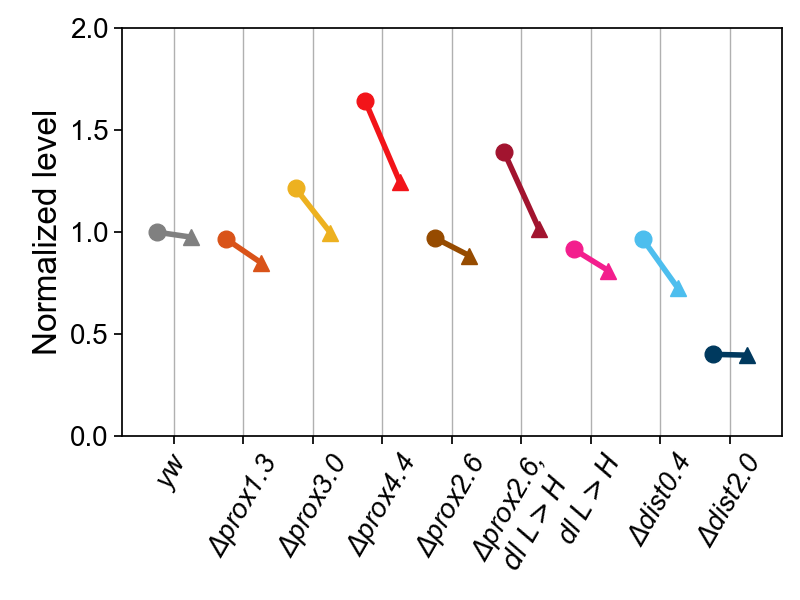

In [29]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
fig.set_size_inches(8, 6)

ind = [0,5,6,8,7,10,9,1,3]
ind2 = [0,1,2,4,3,6,5,7,8]
#ind = [0,11,5,6,7,8,9,10,1,2,3,4]
ax.set_ylabel('Normalized level', fontsize=24)

ax.set_xlim([0,len(ind)*2+1])
ax.set_ylim([0,2])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

j = 1
for i in range(len(ind)):
    ax.plot(j, m[ind2[i],-1,0]/m[0,-1,0], 'o', label=labels[ind[i]], color=colors[ind[i]], markersize=12)
    ax.plot(j+1, m[ind2[i],-1,1]/m[0,-1,0], '^', color=colors[ind[i]], markersize=12)
    # Full [11,8,1]
    # no repressor [0,11,5,6,7,8,10,1,3]
    # dist repressor [11,1]
    # cooperativity [11,6,8,10,1,3]
    #if np.any(ind[i] == np.array([11,8,1])):
        #ax.plot([j,j+1], [m[ind2[i],-1,0]/m[0,-1,0],m[ind2[i],-1,1]/m[0,-1,0]], ':', color=colors[ind[i]], linewidth=4)
    #else:
    ax.plot([j,j+1], [m[ind2[i],-1,0]/m[0,-1,0],m[ind2[i],-1,1]/m[0,-1,0]], '-', color=colors[ind[i]], linewidth=4)
    
    print('1copy/2copies for {0} data = {1:.2f} model = {2:.2f}'.format(simple_labels[ind[i]], arr_1copy[ind2[i]]/arr_2copy[ind2[i]],
                                                                        m[ind2[i],-1,1]/m[ind2[i],-1,0]))
    
    j += 2

ax.set_xticks(np.arange(0,len(ind)*2,2)+1.5)
ax.set_xticklabels([labels[k] for k in ind], style='italic', rotation=60)
ax.grid(axis='x')
            
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=16);
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=32);
plt.tight_layout()

#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/Model_1_0_simple.pdf')

In [30]:
for i in range(len(ind)):
    print('2copies/yw for {0} data = {1:.2f} and model = {2:.2f}'.format(simple_labels[ind[i]],arr_2copy[ind2[i]], 
                                                                        m[ind2[i],-1,0]/m[ind2[0],-1,0]))

2copies/yw for yw data = 1.00 and model = 1.00
2copies/yw for prox 1.3 data = 0.97 and model = 0.97
2copies/yw for prox 3.0 data = 1.21 and model = 1.21
2copies/yw for prox 4.4 data = 1.64 and model = 1.64
2copies/yw for prox 2.6 data = 0.97 and model = 0.97
2copies/yw for prox 2.6, dl L > H} data = 1.39 and model = 1.39
2copies/yw for dl L > H data = 0.92 and model = 0.92
2copies/yw for dist 0.4 data = 0.96 and model = 0.96
2copies/yw for dist 2.0 data = 0.40 and model = 0.40


1copy/2copies for sna^1 data = 0.52 model = 0.50


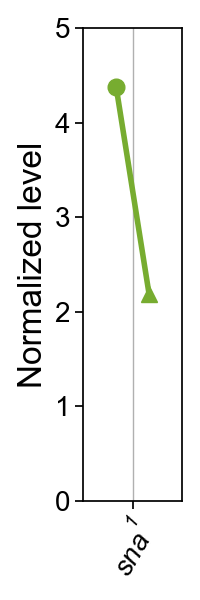

In [31]:
plt.close()

# Set up a figure with axes
fig, ax = plt.subplots(1, 1)

# Label the axes and title the plot
fig.set_size_inches(2, 6)

ind = [11]
ind2 = [9]
#ind = [0,11,5,6,7,8,9,10,1,2,3,4]
ax.set_ylabel('Normalized level', fontsize=24)

ax.set_xlim([0,len(ind)*2+1])
ax.set_ylim([0,5])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

j = 1
for i in range(len(ind)):
    ax.plot(j, m[ind2[i],-1,0]/m[0,-1,0], 'o', label=labels[ind[i]], color=colors[ind[i]], markersize=12)
    ax.plot(j+1, m[ind2[i],-1,1]/m[0,-1,0], '^', color=colors[ind[i]], markersize=12)
    # Full [11,8,1]
    # no repressor [0,11,5,6,7,8,10,1,3]
    # dist repressor [11,1]
    # cooperativity [11,6,8,10,1,3]
    #if np.any(ind[i] == np.array([11,8,1])):
        #ax.plot([j,j+1], [m[ind2[i],-1,0]/m[0,-1,0],m[ind2[i],-1,1]/m[0,-1,0]], ':', color=colors[ind[i]], linewidth=4)
    #else:
    ax.plot([j,j+1], [m[ind2[i],-1,0]/m[0,-1,0],m[ind2[i],-1,1]/m[0,-1,0]], '-', color=colors[ind[i]], linewidth=4)
    
    print('1copy/2copies for {0} data = {1:.2f} model = {2:.2f}'.format(simple_labels[ind[i]], arr_1copy[ind2[i]]/arr_2copy[ind2[i]],
                                                                        m[ind2[i],-1,1]/m[ind2[i],-1,0]))
    
    j += 2

ax.set_xticks(np.arange(0,len(ind)*2,2)+1.5)
ax.set_xticklabels([labels[k] for k in ind], style='italic', rotation=60)
ax.grid(axis='x')
            
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=16);
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=32);
plt.tight_layout()
    
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Leslie_sna_paper/Model_1_0_simple_sna1.pdf')

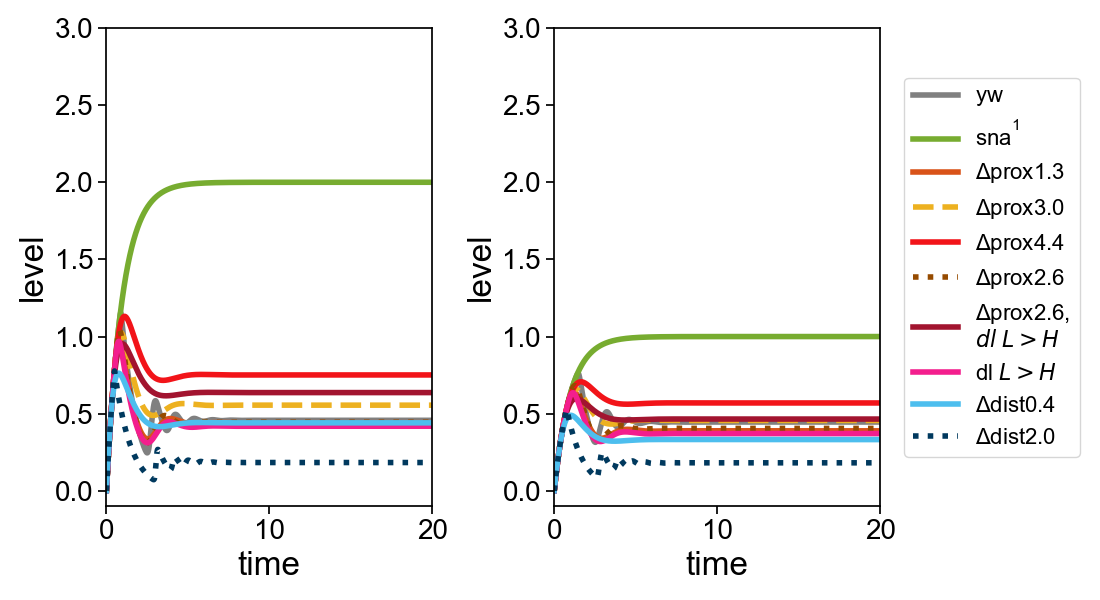

In [32]:
plt.close()

ind = [0,11,5,6,8,7,10,9,1,3]
ind2 = [0,9,1,2,4,3,6,5,7,8]

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(11, 6)

for j in range(2):
    ax[j].set_xlabel('time', fontsize=24)
    ax[j].set_ylabel('level', fontsize=24)
    ax[j].set_xlim([0,20])
    ax[j].set_ylim([-0.1,3])
    ax[j].tick_params(axis='x', labelsize=20)
    ax[j].tick_params(axis='y', labelsize=20)
    for i in range(len(ind)):
        # Make a plot
        if np.any(i == np.array([3, 10, 11])):
            ax[j].plot(t, m[ind2[i],:,j], '--', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
        elif np.any(i == np.array([5, 9])):
            ax[j].plot(t, m[ind2[i],:,j], ':', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
        else:
            ax[j].plot(t, m[ind2[i],:,j], '-', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
            
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=16);
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=32);
plt.tight_layout()
    
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Simulations/sna_time_model.pdf')

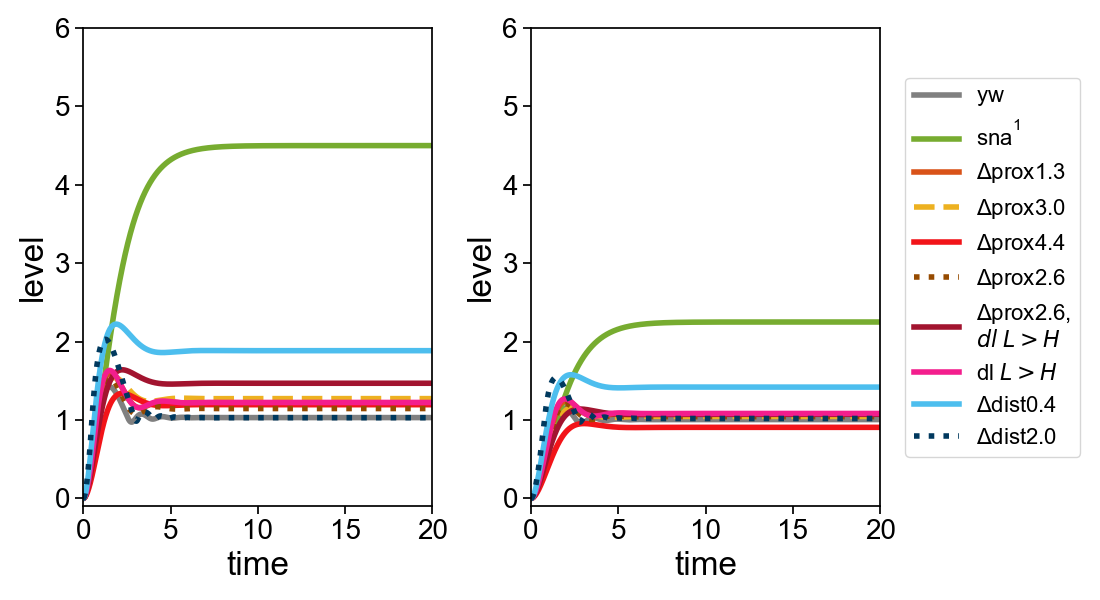

In [33]:
plt.close()

ind = [0,11,5,6,8,7,10,9,1,3]
ind2 = [0,9,1,2,4,3,6,5,7,8]

# Set up a figure with axes
fig, ax = plt.subplots(1, 2)

# Label the axes and title the plot
fig.set_size_inches(11, 6)

for j in range(2):
    ax[j].set_xlabel('time', fontsize=24)
    ax[j].set_ylabel('level', fontsize=24)
    ax[j].set_xlim([0,20])
    ax[j].set_ylim([-0.1,6])
    ax[j].tick_params(axis='x', labelsize=20)
    ax[j].tick_params(axis='y', labelsize=20)
    for i in range(len(ind)):
        # Make a plot
        if np.any(i == np.array([3, 10, 11])):
            ax[j].plot(t, p[ind2[i],:,j], '--', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
        elif np.any(i == np.array([5, 9])):
            ax[j].plot(t, p[ind2[i],:,j], ':', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
        else:
            ax[j].plot(t, p[ind2[i],:,j], '-', label=labels[ind[i]], color=colors[ind[i]], linewidth=4)
            
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=16);
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=32);
plt.tight_layout()
    
#plt.savefig('/Volumes/James McGehee Mac/Documents/Stathopoulos_Lab/Simulations/sna_time_model.pdf')